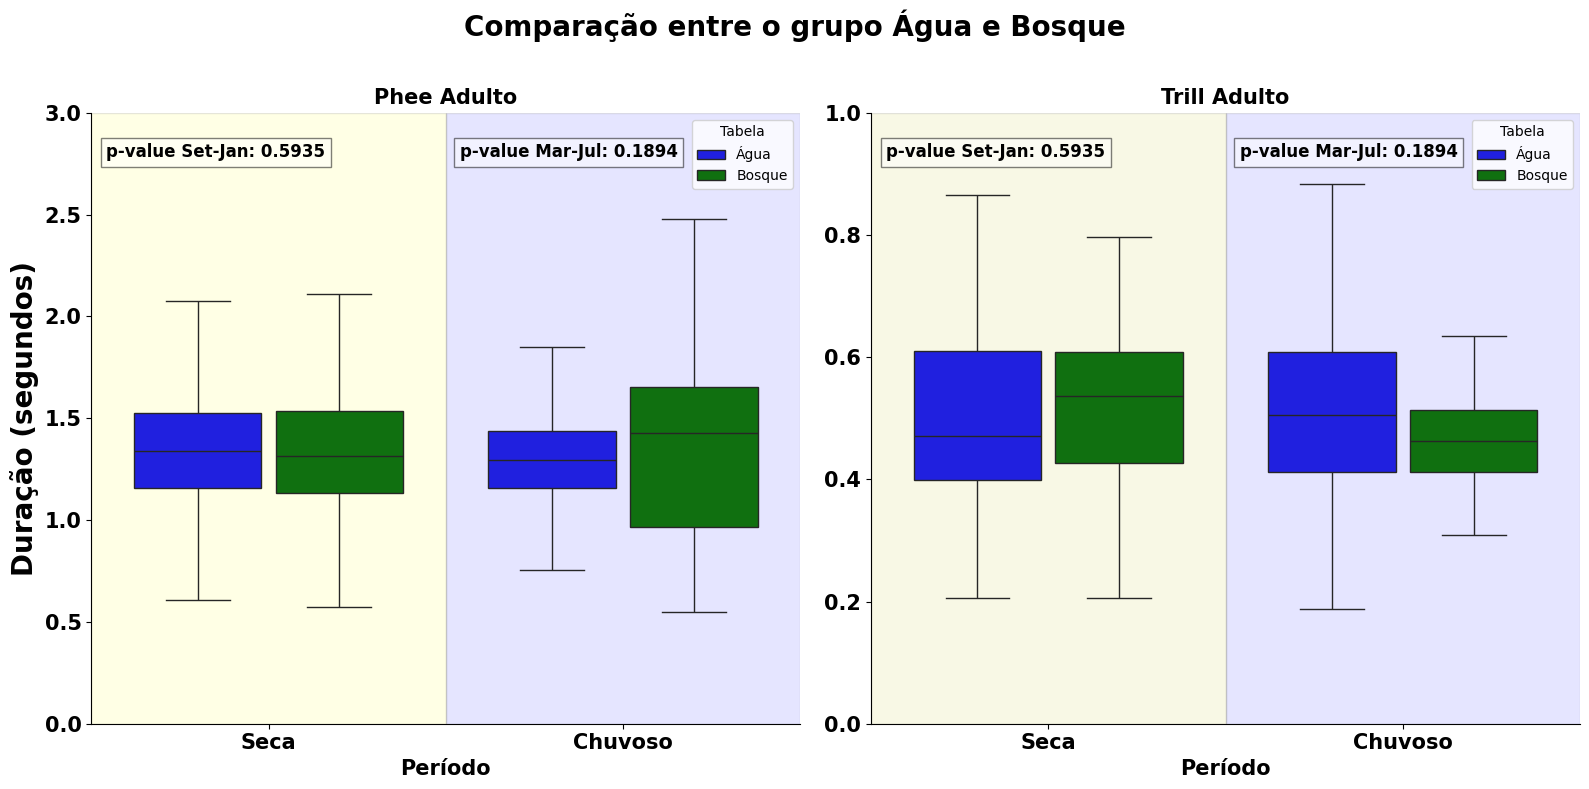

In [91]:
#boxplot comparando das vocalizações ao longo das estações seca e chuvosa e teste t 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Carregando os arquivos Excel
excel_file1 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Agua_bb_adulto.xlsx'
excel_file2 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Bosque_bb_adulto.xlsx'

# Lista de abas para cada tabela
abas_agua = ['Gravador 01', 'Gravador 04', 'Gravador 05', 'Gravador 06']
abas_bosque = ['Gravador 01', 'Gravador 03', 'Gravador 04', 'Gravador 06', 'Gravador 07', 'Gravador 09']

# Lista para armazenar os dataframes de cada aba
df_agua = []
df_bosque = []

# Carregando os DataFrames de cada aba da tabela Água
for aba in abas_agua:
    df_temp = pd.read_excel(excel_file1, sheet_name=aba)
    df_temp['Tabela'] = 'Água'
    df_agua.append(df_temp)

# Carregando os DataFrames de cada aba da tabela Bosque
for aba in abas_bosque:
    df_temp = pd.read_excel(excel_file2, sheet_name=aba)
    df_temp['Tabela'] = 'Bosque'
    df_bosque.append(df_temp)

# Concatenando os dataframes em um único dataframe para cada tabela
combined_df_agua = pd.concat(df_agua, ignore_index=True)
combined_df_bosque = pd.concat(df_bosque, ignore_index=True)

# Concatenando os dataframes das duas tabelas em um único dataframe
combined_df = pd.concat([combined_df_agua, combined_df_bosque], ignore_index=True)

# Convertendo a coluna de Data para o formato de data
combined_df['Data'] = pd.to_datetime(combined_df['Data'], format='%d/%m/%y')

# Filtrando pela vocalização 'phee adulto' e 'trill adulto'
limite_tempo_vocalizacao = 0.0
phee_data = combined_df[(combined_df['Classificacao'] == 'phee adulto') & (combined_df['Tempototal'] > limite_tempo_vocalizacao)].copy()
trill_data = combined_df[(combined_df['Classificacao'] == 'trill adulto') & (combined_df['Tempototal'] > limite_tempo_vocalizacao)].copy()

# Criando uma coluna 'Mês' para armazenar o mês de cada data
phee_data['Mês'] = phee_data['Data'].dt.month
trill_data['Mês'] = trill_data['Data'].dt.month

# Criando uma coluna 'Período' para categorizar os meses
phee_data['Período'] = 'Seca'
phee_data.loc[phee_data['Mês'].between(3, 7), 'Período'] = 'Chuvoso'
trill_data['Período'] = 'Seca'
trill_data.loc[trill_data['Mês'].between(3, 7), 'Período'] = 'Chuvoso'

# Criando uma paleta de cores personalizada para cada tabela
paleta_cores = {'Água': 'blue', 'Bosque': 'green'}

# Criando subplots
plt.figure(figsize=(16, 8))

# Boxplot para Phee Adulto (Set-Jan e Mar-Jul)
plt.subplot(1, 2, 1)
sns.boxplot(x='Período', y='Tempototal', hue='Tabela', data=phee_data, palette=paleta_cores, showfliers=False, gap=.1)
plt.title('Phee Adulto', weight='bold', fontsize=15)

plt.xlim(-0.5, 1.5)
plt.ylim(0,3)
# Adicionando retângulos para indicar estações seca e chuvosa no subplot phee Adulto
plt.axvspan(-0.5, 0.5, facecolor='yellow', alpha=0.1, label='Estação Seca', edgecolor='black')  # Estação Seca
plt.axvspan(0.5, 1.5, facecolor='blue', alpha=0.1, label='Estação Chuvosa', edgecolor='black')  # Estação Chuvosa

# Remover as bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.ylabel('Duração (segundos)', weight='bold', fontsize=20)
plt.xlabel('Período', weight='bold', fontsize=15)
plt.xticks( weight='bold', fontsize=15)  # Configurando os ticks e labels
plt.yticks( weight='bold', fontsize=15)

# Realizando o teste t entre os boxplots dos meses Set-Jan para os dois grupos (Phee Adulto)
tabela1_data_phee = phee_data[(phee_data['Período'] == 'Seca') & (phee_data['Tabela'] == 'Água')]['Tempototal']
tabela2_data_phee = phee_data[(phee_data['Período'] == 'Seca') & (phee_data['Tabela'] == 'Bosque')]['Tempototal']
_, p_value_set_jan_phee = ttest_ind(tabela1_data_phee, tabela2_data_phee)

# Realizando o teste t entre os boxplots dos meses Mar-Jul para os dois grupos (Phee Adulto)
tabela1_data_phee = phee_data[(phee_data['Período'] == 'Chuvoso') & (phee_data['Tabela'] == 'Água')]['Tempototal']
tabela2_data_phee = phee_data[(phee_data['Período'] == 'Chuvoso') & (phee_data['Tabela'] == 'Bosque')]['Tempototal']
_, p_value_mar_jul_phee = ttest_ind(tabela1_data_phee, tabela2_data_phee)

# Adicionando p-values no gráfico para Phee Adulto
plt.text(0.33, 0.95, f'p-value Set-Jan: {p_value_set_jan_trill:.4f}', ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5), weight='bold', fontsize=12)
plt.text(0.52, 0.95, f'p-value Mar-Jul: {p_value_mar_jul_trill:.4f}', ha='left', va='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5), weight='bold', fontsize=12)

# Boxplot para Trill Adulto (Set-Jan e Mar-Jul)
plt.subplot(1, 2, 2)
sns.boxplot(x='Período', y='Tempototal', hue='Tabela', data=trill_data, palette=paleta_cores, showfliers=False, gap=.1)
plt.title('Trill Adulto',weight='bold', fontsize=15)

# Definindo os limites do eixo x para iniciar no limite esquerdo do retângulo amarelo
plt.xlim(-0.5, 1.5)
plt.ylim(0,1)
# Adicionando retângulos para indicar estações seca e chuvosa no subplot Trill Adulto
plt.axvspan(-0.5, 0.5, facecolor='y', alpha=0.1, label='Estação Seca', edgecolor='black')  # Estação Seca
plt.axvspan(0.5, 1.5, facecolor='b', alpha=0.1, label='Estação Chuvosa', edgecolor='black')  # Estação Chuvosa

# Remover as bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Realizando o teste t entre os boxplots dos meses Set-Jan para os dois grupos (Trill Adulto)
tabela1_data_trill = trill_data[(trill_data['Período'] == 'Seca') & (trill_data['Tabela'] == 'Água')]['Tempototal']
tabela2_data_trill = trill_data[(trill_data['Período'] == 'Seca') & (trill_data['Tabela'] == 'Bosque')]['Tempototal']
_, p_value_set_jan_trill = ttest_ind(tabela1_data_trill, tabela2_data_trill)

# Realizando o teste t entre os boxplots dos meses Mar-Jul para os dois grupos (Trill Adulto)
tabela1_data_trill = trill_data[(trill_data['Período'] == 'Chuvoso') & (trill_data['Tabela'] == 'Água')]['Tempototal']
tabela2_data_trill = trill_data[(trill_data['Período'] == 'Chuvoso') & (trill_data['Tabela'] == 'Bosque')]['Tempototal']
_, p_value_mar_jul_trill = ttest_ind(tabela1_data_trill, tabela2_data_trill)

# Adicionando p-values no gráfico para Trill Adulto
plt.text(0.33, 0.95, f'p-value Set-Jan: {p_value_set_jan_trill:.4f}', ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5), weight='bold', fontsize=12)
plt.text(0.52, 0.95, f'p-value Mar-Jul: {p_value_mar_jul_trill:.4f}', ha='left', va='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5), weight='bold', fontsize=12)

# Adicionando título e rótulos
plt.suptitle('Comparação entre o grupo Água e Bosque', weight='bold', fontsize=20)
plt.xlabel('Período', weight='bold', fontsize=15)
plt.ylabel('', weight='bold', fontsize=12)
plt.xticks( weight='bold', fontsize=15)  # Configurando os ticks e labels
plt.yticks( weight='bold', fontsize=15)
# Ajustando o layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Ajustando o espaçamento entre os subplots
plt.subplots_adjust(wspace=0.1)


# plt.savefig(r'G:\Meu Drive\Mestrado\Triagem dos dados\imagens\boxplot_comparação phee e trill grupos.png', bbox_inches='tight')

# Exibindo o gráfico
plt.show()

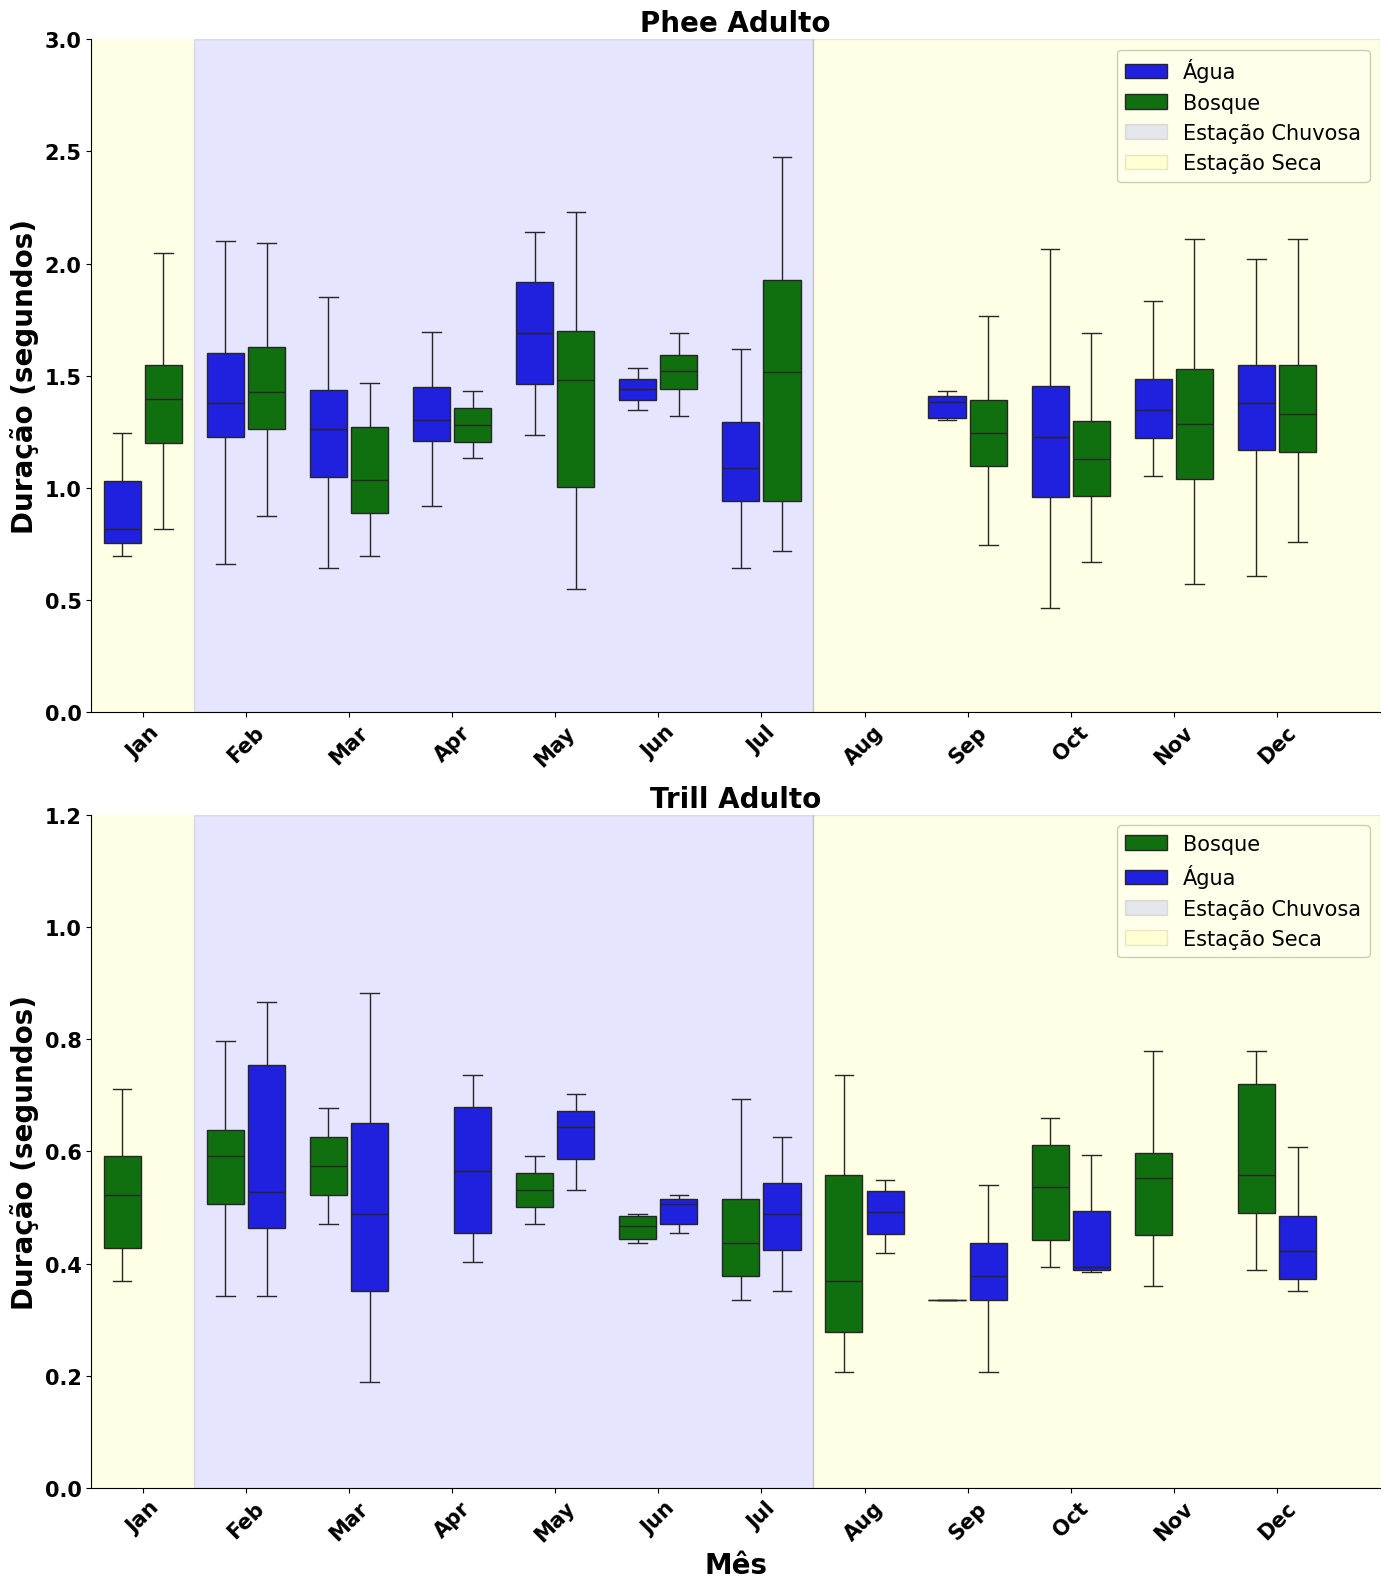

In [117]:
#boxplot meses grupo água e bosque phee e trill adulto
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import calendar

# Carregando os arquivos Excel
excel_file1 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Agua_bb_adulto.xlsx'
excel_file2 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Bosque_bb_adulto.xlsx'

# Lista de abas para a primeira tabela
abas_agua = ['Gravador 01', 'Gravador 04', 'Gravador 05', 'Gravador 06']

# Lista de abas para a segunda tabela
abas_bosque = ['Gravador 01', 'Gravador 03', 'Gravador 04', 'Gravador 06', 'Gravador 07', 'Gravador 09']

# Lista para armazenar os dataframes de cada aba da primeira tabela
df_agua = []

# Lista para armazenar os dataframes de cada aba da segunda tabela
df_bosque = []

# Carregando os DataFrames de cada aba da primeira tabela
for aba in abas_agua:
    df_temp = pd.read_excel(excel_file1, sheet_name=aba)
    df_temp['Tabela'] = 'Água'
    df_agua.append(df_temp)

# Carregando os DataFrames de cada aba da segunda tabela
for aba in abas_bosque:
    df_temp = pd.read_excel(excel_file2, sheet_name=aba)
    df_temp['Tabela'] = 'Bosque'
    df_bosque.append(df_temp)

# Concatenando todos os dataframes em um único dataframe para Água
combined_df_agua = pd.concat(df_agua, ignore_index=True)

# Concatenando todos os dataframes em um único dataframe para Bosque
combined_df_bosque = pd.concat(df_bosque, ignore_index=True)

# Concatenando todos os dataframes das duas tabelas em um único dataframe
combined_df = pd.concat([combined_df_agua, combined_df_bosque], ignore_index=True)

# Convertendo a coluna de Data para o formato de data
combined_df['Data'] = pd.to_datetime(combined_df['Data'], format='%d/%m/%y')

# Filtrando pela vocalização 'phee adulto' e 'trill adulto' com tempo maior ou igual ao limite
limite_tempo = 0.0  # Defina o limite de tempo desejado

tsik_data = combined_df[(combined_df['Classificacao'] == 'phee adulto') & (combined_df['Tempototal'] >= limite_tempo)].copy()
trill_data = combined_df[(combined_df['Classificacao'] == 'trill adulto') & (combined_df['Tempototal'] >= limite_tempo)].copy()

# Criando uma coluna 'Mês' para armazenar o mês de cada data
tsik_data['Mês'] = tsik_data['Data'].dt.month
trill_data['Mês'] = trill_data['Data'].dt.month

# Criando uma paleta de cores personalizada para cada tabela
paleta_cores = {'Água': 'blue', 'Bosque': 'green'}

# Ajustando o tamanho da figura para garantir que o mês de dezembro não seja cortado
plt.figure(figsize=(14, 16))

# Criando o boxplot para 'phee adulto' com a paleta de cores personalizada
plt.subplot(2, 1, 1)
sns.boxplot(x='Mês', y='Tempototal', hue='Tabela', data=tsik_data, palette=paleta_cores, order=range(1, 13), showfliers=False, gap=.1)
plt.axvspan(0.5, 6.5, facecolor='blue', alpha=0.1, label='Estação Chuvosa', edgecolor='black')  # Estação Chuvosa
plt.axvspan(-0.5, 0.5, facecolor='yellow', alpha=0.1)  # Estação seca
plt.axvspan(6.5, 12, facecolor='yellow', alpha=0.1, label='Estação Seca', edgecolor='black')  # Estação Seca
plt.title('Phee Adulto', weight='bold', fontsize=20)
plt.xlabel('', weight='bold', fontsize=15)
plt.ylabel('Duração (segundos)', weight='bold', fontsize=20)
plt.xticks(ticks=range(12), labels=[calendar.month_abbr[i] for i in range(1, 13)], rotation=45, weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)
plt.legend(loc='upper right', framealpha=0.2, edgecolor='black', fontsize=15)

plt.xlim(-0.5, 12)  # Ajuste de acordo com a escala do eixo x
plt.ylim(0, 3)  # Substitua 'limite_superior' pelo valor desejado para o eixo y
# Remover as bordas superior e esquerda
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Criando o boxplot para 'trill adulto' com a paleta de cores personalizada
plt.subplot(2, 1, 2)
sns.boxplot(x='Mês', y='Tempototal', hue='Tabela', data=trill_data, palette=paleta_cores, order=range(1, 13), showfliers=False, gap=.1)
plt.axvspan(0.5, 6.5, facecolor='blue', alpha=0.1, label='Estação Chuvosa', edgecolor='black')  # Estação Chuvosa
plt.axvspan(-0.5, 0.5, facecolor='yellow', alpha=0.1)  # Estação seca
plt.axvspan(6.5, 12, facecolor='yellow', alpha=0.1, label='Estação Seca', edgecolor='black')  # Estação Seca
plt.title('Trill Adulto', weight='bold', fontsize=20)
plt.xlabel('Mês', weight='bold', fontsize=20)
plt.ylabel('Duração (segundos)', weight='bold', fontsize=20)
plt.xticks(ticks=range(12), labels=[calendar.month_abbr[i] for i in range(1, 13)], rotation=45, weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)
plt.legend(loc='upper right', framealpha=0.2, edgecolor='black', fontsize=15)
# Ajustando o tamanho dos eixos x e y
plt.xlim(-0.5, 12)  # Ajuste de acordo com a escala do eixo x
plt.ylim(0, 1.2)  # Substitua 'limite_superior' pelo valor desejado para o eixo y
# Remover as bordas superior e esquerda
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
# plt.savefig(r'G:\Meu Drive\Mestrado\Triagem dos dados\imagens\boxplot_meses_phee_Trill_adulto.png', bbox_inches='tight')
#
plt.show()

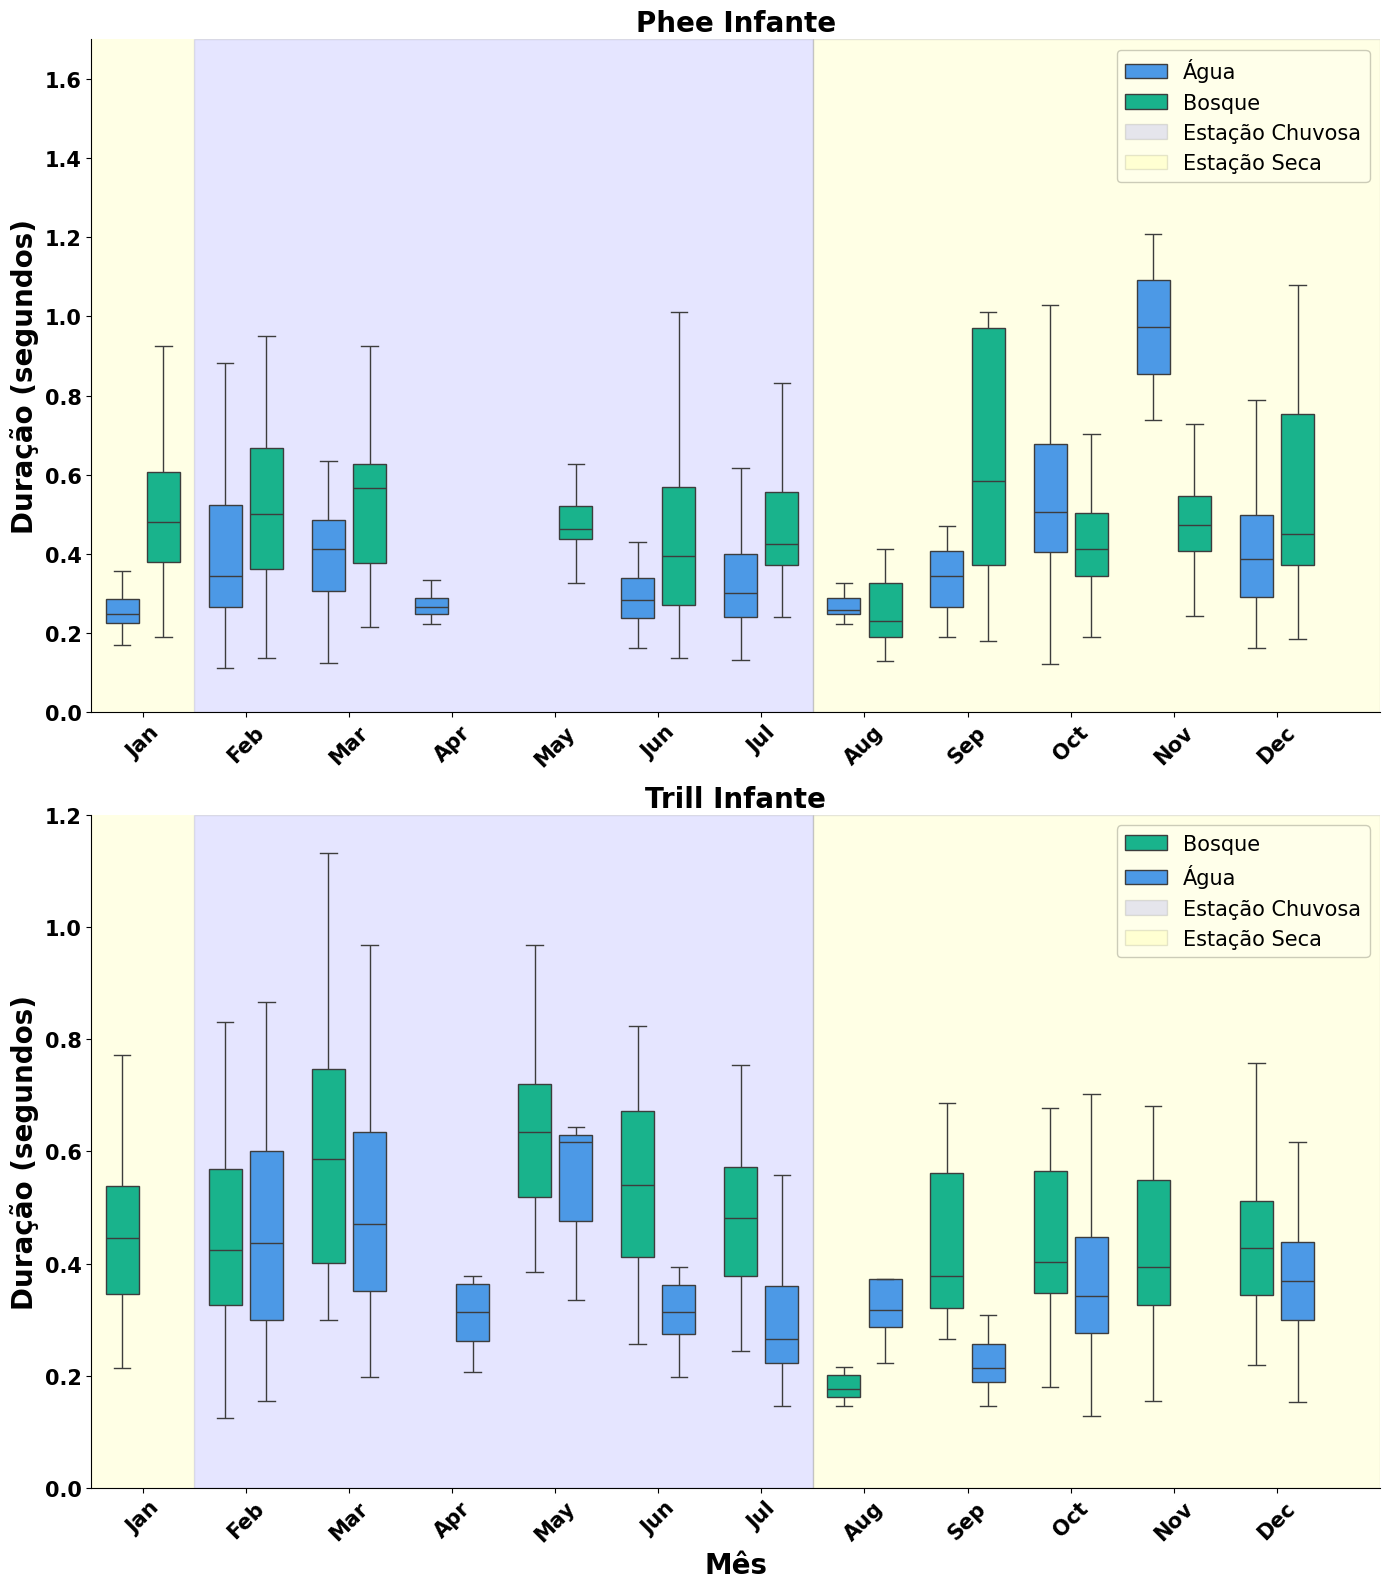

In [157]:
#boxplot meses grupo água e bosque phee e trill bb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import calendar

# Carregando os arquivos Excel
excel_file1 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Agua_bb_adulto.xlsx'
excel_file2 = r'C:\Users\Ricardo\Desktop\Tabelas_grupos\Bosque_bb_adulto.xlsx'

# Lista de abas para a primeira tabela
abas_agua = ['Gravador 01', 'Gravador 04', 'Gravador 05', 'Gravador 06']

# Lista de abas para a segunda tabela
abas_bosque = ['Gravador 01', 'Gravador 03', 'Gravador 04', 'Gravador 06', 'Gravador 07', 'Gravador 09']

# Lista para armazenar os dataframes de cada aba da primeira tabela
df_agua = []

# Lista para armazenar os dataframes de cada aba da segunda tabela
df_bosque = []

# Carregando os DataFrames de cada aba da primeira tabela
for aba in abas_agua:
    df_temp = pd.read_excel(excel_file1, sheet_name=aba)
    df_temp['Tabela'] = 'Água'
    df_agua.append(df_temp)

# Carregando os DataFrames de cada aba da segunda tabela
for aba in abas_bosque:
    df_temp = pd.read_excel(excel_file2, sheet_name=aba)
    df_temp['Tabela'] = 'Bosque'
    df_bosque.append(df_temp)

# Concatenando todos os dataframes em um único dataframe para Água
combined_df_agua = pd.concat(df_agua, ignore_index=True)

# Concatenando todos os dataframes em um único dataframe para Bosque
combined_df_bosque = pd.concat(df_bosque, ignore_index=True)

# Concatenando todos os dataframes das duas tabelas em um único dataframe
combined_df = pd.concat([combined_df_agua, combined_df_bosque], ignore_index=True)

# Convertendo a coluna de Data para o formato de data
combined_df['Data'] = pd.to_datetime(combined_df['Data'], format='%d/%m/%y')

# Filtrando pela vocalização 'phee adulto' e 'trill adulto' com tempo maior ou igual ao limite
limite_tempo = 0.0  # Defina o limite de tempo desejado

tsik_data = combined_df[(combined_df['Classificacao'] == 'phee bb') & (combined_df['Tempototal'] >= limite_tempo)].copy()
trill_data = combined_df[(combined_df['Classificacao'] == 'trill bb') & (combined_df['Tempototal'] >= limite_tempo)].copy()

# Criando uma coluna 'Mês' para armazenar o mês de cada data
tsik_data['Mês'] = tsik_data['Data'].dt.month
trill_data['Mês'] = trill_data['Data'].dt.month

# Criando uma paleta de cores personalizada para cada tabela
paleta_cores = {'Bosque': '#00cc99', 'Água': '#3399ff'}

# Ajustando o tamanho da figura para garantir que o mês de dezembro não seja cortado
plt.figure(figsize=(14, 16))

# Criando o boxplot para 'phee adulto' com a paleta de cores personalizada
plt.subplot(2, 1, 1)
sns.boxplot(x='Mês', y='Tempototal', hue='Tabela', data=tsik_data, palette=paleta_cores, order=range(1, 13), showfliers=False, gap=.2)
plt.axvspan(0.5, 6.5, facecolor='blue', alpha=0.1, label='Estação Chuvosa', edgecolor='black')  # Estação Chuvosa
plt.axvspan(-0.5, 0.5, facecolor='yellow', alpha=0.1)  # Estação seca
plt.axvspan(6.5, 12, facecolor='yellow', alpha=0.1, label='Estação Seca', edgecolor='black')  # Estação Seca
plt.title('Phee Infante', weight='bold', fontsize=20)
plt.xlabel('', weight='bold', fontsize=15)
plt.ylabel('Duração (segundos)', weight='bold', fontsize=20)
plt.xticks(ticks=range(12), labels=[calendar.month_abbr[i] for i in range(1, 13)], rotation=45, weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)
plt.legend(loc='upper right', framealpha=0.2, edgecolor='black', fontsize=15)

plt.xlim(-0.5, 12)  # Ajuste de acordo com a escala do eixo x
plt.ylim(0, 1.7)  # Substitua 'limite_superior' pelo valor desejado para o eixo y
# Remover as bordas superior e esquerda
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Criando o boxplot para 'trill adulto' com a paleta de cores personalizada
plt.subplot(2, 1, 2)
sns.boxplot(x='Mês', y='Tempototal', hue='Tabela', data=trill_data, palette=paleta_cores, order=range(1, 13), showfliers=False, gap=.2)
plt.axvspan(0.5, 6.5, facecolor='blue', alpha=0.1, label='Estação Chuvosa', edgecolor='black')  # Estação Chuvosa
plt.axvspan(-0.5, 0.5, facecolor='yellow', alpha=0.1)  # Estação seca
plt.axvspan(6.5, 12, facecolor='yellow', alpha=0.1, label='Estação Seca', edgecolor='black')  # Estação Seca
plt.title('Trill Infante', weight='bold', fontsize=20)
plt.xlabel('Mês', weight='bold', fontsize=20)
plt.ylabel('Duração (segundos)', weight='bold', fontsize=20)
plt.xticks(ticks=range(12), labels=[calendar.month_abbr[i] for i in range(1, 13)], rotation=45, weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)
plt.legend(loc='upper right', framealpha=0.2, edgecolor='black', fontsize=15)
# Ajustando o tamanho dos eixos x e y
plt.xlim(-0.5, 12)  # Ajuste de acordo com a escala do eixo x
plt.ylim(0, 1.2)  # Substitua 'limite_superior' pelo valor desejado para o eixo y
# Remover as bordas superior e esquerda
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(r'G:\Meu Drive\Mestrado\Triagem dos dados\imagens\boxplot_meses_phee_Trill_infante.png', bbox_inches='tight')
#
plt.show()